# Hotel Review Sentiment

Negli ultimi anni i consumatori sempre di più utilizzano i rating e le recensioni come strumenti per determinare le loro decisioni, specialmente quando viaggiano verso nuove destinazioni. Pertanto le recensioni e i rating lasciati dagli utenti sono uno strumento di fondamentale importanza che può portare ad impattare pesantemente la reputazione di un hotel e i conseguenti guadagni.

Quali sono le parole che sono indicatori di recensioni positivi o negative? Come tali parole impattano nel risultato di una recensione?
Impatto?
Lato Business: Individuare cosa migliorare, parole con più impattano determinano aspetti che sono di fondamentale importanza per mantenere un servizio di qualità
Lato Customer: Quali sono le parole più efficaci in una recensione, quali impattano di più sull'opinione dell' hotel
Tramite uso di Sentiment Analysis e NLP


Il dataset utilizzato è "515K Hotel Reviews Data in Europe"
https://www.kaggle.com/code/jonathanoheix/sentiment-analysis-with-hotel-reviews
tale dataset di dimensione 45 MB contiene recensioni di vari hotel di lusso in Europa raccolte da Booking.com dal 2015 al 2017

In [ ]:
!pip install nltk
!pip install matplotlib
!pip install seaborn
!pip install numpy

## Import Dataset

Fonte: https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # plotting

from nltk.tokenize import word_tokenize
import plotly.express as px


In [ ]:
url='hotel_reviews.csv'
df = pd.read_csv(url, encoding = "ISO-8859-2")

In [ ]:
df.head(5)

L'Hotel "DoubleTree by Hilton Hotel London Tower of London" non viene considerato in quanto verrà utilizzato come dataset di test nella dashboard. La dashboar prodotta si baserà sulle recensioni di tale hotel per fornire insight alla stuttura rcettiva.

In [ ]:
df = df.drop(df[df["Notel_Name"] == "DoubleTree by Hilton Hotel London Tower of London"].index)

##Descriptive Analysis

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calcola le percentuali delle recensioni negative
negative_reviews = df["Negative_Review"].str.lower()
negative_reviews = negative_reviews[~negative_reviews.isin(["no negative", "na", "n a"])]

negative_percentage = (len(negative_reviews) / len(df)) * 100

# Calcola le percentuali delle recensioni positive
positive_reviews = df["Positive_Review"].str.lower()
positive_reviews = positive_reviews[~positive_reviews.isin(["no positive", "na", "n a"])]

positive_percentage = (len(positive_reviews) / len(df)) * 100

# Crea il grafico a torta
labels = ["Negative Reviews", "Positive Reviews"]
sizes = [negative_percentage, positive_percentage]
colors = ["dodgerblue", "limegreen"]
explode = (0.1, 0)  # Esplosione del primo settore (Negative Reviews)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Rende il grafico a torta circolare
plt.title('Percentuale di recensioni negative e positive')

plt.show()


In [ ]:
# Calcola la media per ogni gruppo di "Reviewer_Nationality"
grouped = df.groupby("Reviewer_Nationality")["Reviewer_Score"].mean()


# Ordina i gruppi in ordine decrescente per valore medio
sorted_grouped = grouped.sort_values(ascending=False)

# Seleziona i 5 gruppi con valore medio più alto e i 5 gruppi con valore medio più basso
top_5 = sorted_grouped.head(5)
bottom_5 = sorted_grouped.tail(5)

# Combina i 5 gruppi con valore medio più alto e i 5 gruppi con valore medio più basso
combined_groups = pd.concat([top_5, bottom_5])

colors = ['limegreen'] * 5 + ['dodgerblue'] * 5


# Crea il grafico a barre
plt.figure(figsize=(10, 6))
combined_groups.plot(kind='bar', color=colors)
plt.xlabel("Reviewer Nationality")
plt.ylabel("Average Rating")
plt.title("Comparison of Average Ratings by Reviewer Nationality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calcola la media per ogni gruppo di "Reviewer_Nationality"
grouped = df.groupby("Reviewer_Nationality")["Total_Number_of_Reviews_Reviewer_Has_Given"].mean()

# Ordina i gruppi in ordine decrescente per valore medio
sorted_grouped = grouped.sort_values(ascending=False)

# Seleziona i 5 gruppi con valore medio più alto e i 5 gruppi con valore medio più basso
top_5 = sorted_grouped.head(5)
bottom_5 = sorted_grouped.tail(5)

# Combina i 5 gruppi con valore medio più alto e i 5 gruppi con valore medio più basso
combined_groups = pd.concat([top_5, bottom_5])

colors = ['paleturquoise'] * 5 + ['purple'] * 5


# Crea il grafico a barre
plt.figure(figsize=(10, 6))
combined_groups.plot(kind='bar', color=colors)
plt.xlabel("Reviewer Nationality")
plt.ylabel("Quantity Rating")
plt.title("Comparison of Average Ratings by Reviewer Nationality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Calcola la media per ogni gruppo di "Reviewer_Nationality" per i punteggi dei revisori
grouped_scores = df.groupby("Reviewer_Nationality")["Reviewer_Score"].mean()

# Ordina i gruppi in ordine decrescente per valore medio
sorted_grouped_scores = grouped_scores.sort_values(ascending=False)

# Seleziona i 5 gruppi con valore medio più alto e i 5 gruppi con valore medio più basso per i punteggi dei revisori
top_5_scores = sorted_grouped_scores.head(5)
bottom_5_scores = sorted_grouped_scores.tail(5)

# Calcola la media per ogni gruppo di "Reviewer_Nationality" per le quantità di recensioni
grouped_quantities = df.groupby("Reviewer_Nationality")["Total_Number_of_Reviews_Reviewer_Has_Given"].mean()

# Ordina i gruppi in ordine decrescente per valore medio
sorted_grouped_quantities = grouped_quantities.sort_values(ascending=False)

# Seleziona i 5 gruppi con valore medio più alto e i 5 gruppi con valore medio più basso per le quantità di recensioni
top_5_quantities = sorted_grouped_quantities.head(5)
bottom_5_quantities = sorted_grouped_quantities.tail(5)

# Combina i 5 gruppi con valore medio più alto e i 5 gruppi con valore medio più basso per i punteggi dei revisori
combined_scores = pd.concat([top_5_scores, bottom_5_scores])

# Combina i 5 gruppi con valore medio più alto e i 5 gruppi con valore medio più basso per le quantità di recensioni
combined_quantities = pd.concat([top_5_quantities, bottom_5_quantities])

# Crea il grafico a barre combinato
plt.figure(figsize=(12, 6))

# Grafico per i punteggi dei revisori
ax1 = plt.subplot(1, 1, 1)
colors_scores = ['limegreen'] * 5 + ['dodgerblue'] * 5
combined_scores.plot(kind='bar', color=colors_scores, ax=ax1)
ax1.set_xlabel("Reviewer Nationality")
ax1.set_ylabel("Average Rating")
ax1.set_title("Comparison of Average Ratings and Review Quantities by Reviewer Nationality")

# Secondo asse y per le quantità di recensioni
ax2 = ax1.twinx()
colors_quantities = ['paleturquoise'] * 5 + ['purple'] * 5
combined_quantities.plot(kind='bar', color=colors_quantities, ax=ax2)
ax2.set_ylabel("Quantity Rating")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Estrai l'anno dalle ultime 4 cifre della colonna "Review_Date"
df['Year'] = df['Review_Date'].str[-4:]

# Calcola la quantità di recensioni per ogni anno
reviews_per_year = df['Year'].value_counts().sort_index()

# Crea il plot come uno scatter plot con linee
plt.figure(figsize=(10, 6))
reviews_per_year.plot(kind='line', marker='o', linestyle='-', color=['teal'])
plt.xlabel("Anno")
plt.ylabel("Quantità di Recensioni")
plt.title("Quantità di Recensioni per Anno")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

# Converti la colonna "reviewer_score" in numerica
df['Reviewer_Score'] = pd.to_numeric(df['Reviewer_Score'], errors='coerce')

# Calcola il rating medio per ogni anno
average_rating_per_year = df.groupby('Year')['Reviewer_Score'].mean()

# Crea il plot come uno scatter plot con linee
plt.figure(figsize=(10, 6))
average_rating_per_year.plot(kind='line', marker='o', linestyle='-', color=['maroon'])
plt.xlabel("Anno")
plt.ylabel("Score medio")
plt.title("Score medio per Anno")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



```
# Questo è formattato come codice
```

Utilizziamo solo parte del dataset per ridurre il carico computazionale

In [ ]:
df = df[["Hotel_Name","Average_Score","Reviewer_Score", "Negative_Review" ,"Positive_Review", "Reviewer_Nationality"]]

In [ ]:
df.head(5)

In [ ]:
df.value_counts('Reviewer_Score')

In [ ]:
df.value_counts('Reviewer_Nationality')

Hotel Averege score
INSIGHT: la maggior parte degli hotel sono classificati positivamente

In [ ]:
data_plot = df[["Hotel_Name","Average_Score"]].drop_duplicates()
data_plot_avg = data_plot.plot.hist()
plt.show()

In [ ]:
average_rating = df['Reviewer_Score'].mean()
average_rating

In [ ]:
figure = px.histogram(df, x='Reviewer_Nationality', nbins=5, text_auto=True).update_xaxes(categoryorder='total descending')
figure.show()

In [ ]:
df.value_counts('Reviewer_Nationality')

In [ ]:
figure = px.histogram(df, x='Hotel_Name', nbins=5, text_auto=True).update_xaxes(categoryorder='total descending')
figure.show()

In [ ]:
df.value_counts('Hotel_Name')

In [ ]:
fig = px.box(df, x="Reviewer_Nationality", y="Reviewer_Score")
fig.show()

##Dataset Preprocessing

In [ ]:
df.duplicated().any()

Eliminazione recensioni meno significative, due parole portano poco significato alla recensione. In una recesione si sttende una giustificazione della propria rispost, affinchè sia costruttiva per entrambe le parti

In [ ]:
df.value_counts('Negative_Review').head(50)

In [ ]:
df.shape

In [ ]:
# elimina le recensioni che hanno meno di 2 parole
df = df[df['Negative_Review'].str.split().str.len() > 2]
df = df[df['Positive_Review'].str.split().str.len() > 2]

df.value_counts('Negative_Review').head(50)

In [ ]:
df.shape

In [ ]:
import numpy as np

#unisco le due colonne "Negative_Review" e "Positive_Review"
df["review"] = df["Negative_Review"] + df["Positive_Review"]

# stampa il dataframe risultante
#df.head()

df.shape[0]

df.value_counts('review').head(50)

Per prima cosa si è deciso di unire le due feature "Negative_Review" e "Positive_Review", in modo da ottenere un'unica colonna di recensioni da cui estrarre la valutazione positiva o negativa.

Prima di procedere, però, si è scelto di eliminare tutte quelle recensioni in cui vi è scritto "No negative" o "No positive" all'interno del testo. Tale scelta è stata intrapresa in quanto tali affermazioni stanno a significare che non è stata rilasciata alcuna una recensione (positiva o negativa a seconda del caso).

In [ ]:
df["review"] = df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))
df.value_counts('review').head(50)

In [ ]:
df.dropna(subset=['review'], inplace=True)

In [ ]:
review = df['review']

##Ridefinzione Review Score

Trasformazione in classi binarie
Si decide di ridurre le 10 classi disponibili a due, nonostante perdo contenuto informativo questo consente al modello di prendere una decisione chiara sulla recensione.

In [ ]:
import pandas as pd


# definisco una funzione che suddivide i valori nel seguente modo:
#     - se la recensione è <6 allora assegno 0
#     - se la recensione >= 6 allora assegno 1
def new_score(score):
    if score < 6:
        return 0
    else:
        return 1



# applico la funzione ad ogni valore contenuto nella colonna "Reviewer_Score"
df["Reviewer_Score"] = df["Reviewer_Score"].apply(new_score)


In [ ]:
sns.countplot(data=df, x='Reviewer_Score')
plt.show()

In [ ]:
df.value_counts('Reviewer_Score')
# la classe minoritaria contiene circa 8,7% dei dati

##Undersampling
Il dataset risulta sbilanciato, è necessario intervenire per rendere tutte le classi eque in modo da ottenere un modello allenato a riconoscere le classi correttamente.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# separo la colonna di classe dal resto dei dati
X = df.drop("Reviewer_Score", axis=1)
y = df["Reviewer_Score"]

# creo l'oggetto RandomUnderSampler
rus = RandomUnderSampler(random_state=None)

# applico l'undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# creo un nuovo dataframe con i dati bilanciati
df = pd.DataFrame(X_resampled, columns=X.columns)
df["Reviewer_Score"] = y_resampled

In [ ]:
sns.countplot(data=df, x='Reviewer_Score')
plt.show()

In [ ]:
df.value_counts('Reviewer_Score')

In [ ]:
#df = df.groupby('Reviewer_Score', group_keys=False).apply(lambda x: x.sample(frac=0.10))

In [ ]:
df["Words Per Review"] = df["review"].str.split().apply(len)
df.boxplot("Words Per Review", by="Reviewer_Score", grid=False,
showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
df.shape

## Review Data Cleaning Function


Quando si ha a che fare testi scritti online, si tende a voler identificare alcuni insiemi di caratteri - eg. emoticons - come oggetti separati cercando di non tokenizzarli come caratteri individuali.
Generalmente su piattaforme come Booking questo accade di rado, ma meglio prevenire.

Rimuovo punteggiature e simboli fraintendibili.

NLTK è una piattaforma leader per la creazione di programmi Python per lavorare con i dati del linguaggio umano.

Fornisce interfacce facili da usare per oltre 50 corpora e risorse lessicali come WordNet,
insieme a una suite di librerie di elaborazione del testo per la classificazione, la tokenizzazione, stemming, tagging, parsing e ragionamento semantico, wrapper per librerie di #NLP di livello industriale librerie NLP di livello industriale e un forum di discussione attivo.

NLTK è una delle principali piattaforme per lavorare con i dati del linguaggio umano e Python, il modulo NLTK viene utilizzato per l'elaborazione del linguaggio naturale. NLTK è letteralmente l'acronimo di Natural Language Toolkit.

Il primo passo comune in NLP (Natural Language Processing) è la tokenizzazione.

I token sono di solito singole parole (almeno in lingue come l'inglese) e la tokenizzazione consiste nel prendere un testo o un insieme di testi e scomporli in singole parole.

Questi token vengono poi utilizzati come input per altri tipi di analisi o compiti.

Estraggo le parole contenute in tutte le review e le raggruppo in una specie di lista Pandas.

In [ ]:
import string
import nltk
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
from nltk.tokenize import word_tokenize

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # drop spaces start and end text
    text = text.strip()
    # tokenize text and remove punctuation
    text = word_tokenize(text)
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = set(stopwords.words('english'))
    stop = set([item for item in stop if item not in ["not", "nor", "against"]])
    additional_stopwords = [
        "The", "And", "I", "J", "K", "I'd", "That's", "\x81", "It", "I'm", "...", "\x89", "ĚĄ",
        "it's", "ă", "\x9d", "âÂĺ", "Ě", "˘", "Â", "âÂ", "Ň", "http", "https", "co", "000",
        "Ň", "Ň", "Ň", "ââ", 'ě', 'ň',
        'didnt', 'did', 'havent', 'week', 'hi', 'wa', 'ha', 'day', 'today', 'really', 'also',
        'go', 'us', 'dont', 'got', 'im', 'ive', 'burger', 'food', 'came', 'back',
        'get', 'try', 'would', 'time', 'good', 'great', 'service', 'didn', 'definitely', 'hotel', 'went', 'took', 'left',
        'check', 'told', 'asked', 'like', 'don', 'wasn', 'hotels', 'just', 'don', 'said', 'people', 've', 'stay', 'stayed',
        'loved', 'com', 'night', 'birthday', 'free', 'touch', 'little', 'given', 'making', 'hear', 'recommend', 'card', 'make',
        'feel', 'days', 'differ', 'thier', 'couldn', 'breakfast', 'got', 'everyone', 'anything', 'everything', 'one', 'nothing', 'much'
    ]
    stop.update(additional_stopwords)
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return text

df['review_preprocessed'] = df['review'].apply(lambda x: clean_text(x))


In [ ]:
from collections import Counter

# Unisci tutti i testi preelaborati in un'unica lista
all_text = " ".join(df['review_preprocessed'].tolist())

# Tokenize il testo
tokens = word_tokenize(all_text)

# Calcola la frequenza delle parole
word_freq = Counter(tokens)

# Ottieni le 10 parole più comuni
top_10_words = word_freq.most_common(50)

print(top_10_words)

In [ ]:
df['review_preprocessed'].iloc[50000]

##Word Cloud

In [ ]:
from wordcloud import WordCloud
reviews_pos = df['Positive_Review'].apply(lambda x: clean_text(x))
reviews_neg = df['Negative_Review'].apply(lambda x: clean_text(x))

In [ ]:
reviews_pos_token = [word_tokenize(sublist) for sublist in reviews_pos]
reviews_pos_list = [item for sublist in reviews_pos_token for item in sublist]

reviews_neg_token = [word_tokenize(sublist) for sublist in reviews_neg]
reviews_neg_list = [item for sublist in reviews_neg_token for item in sublist]

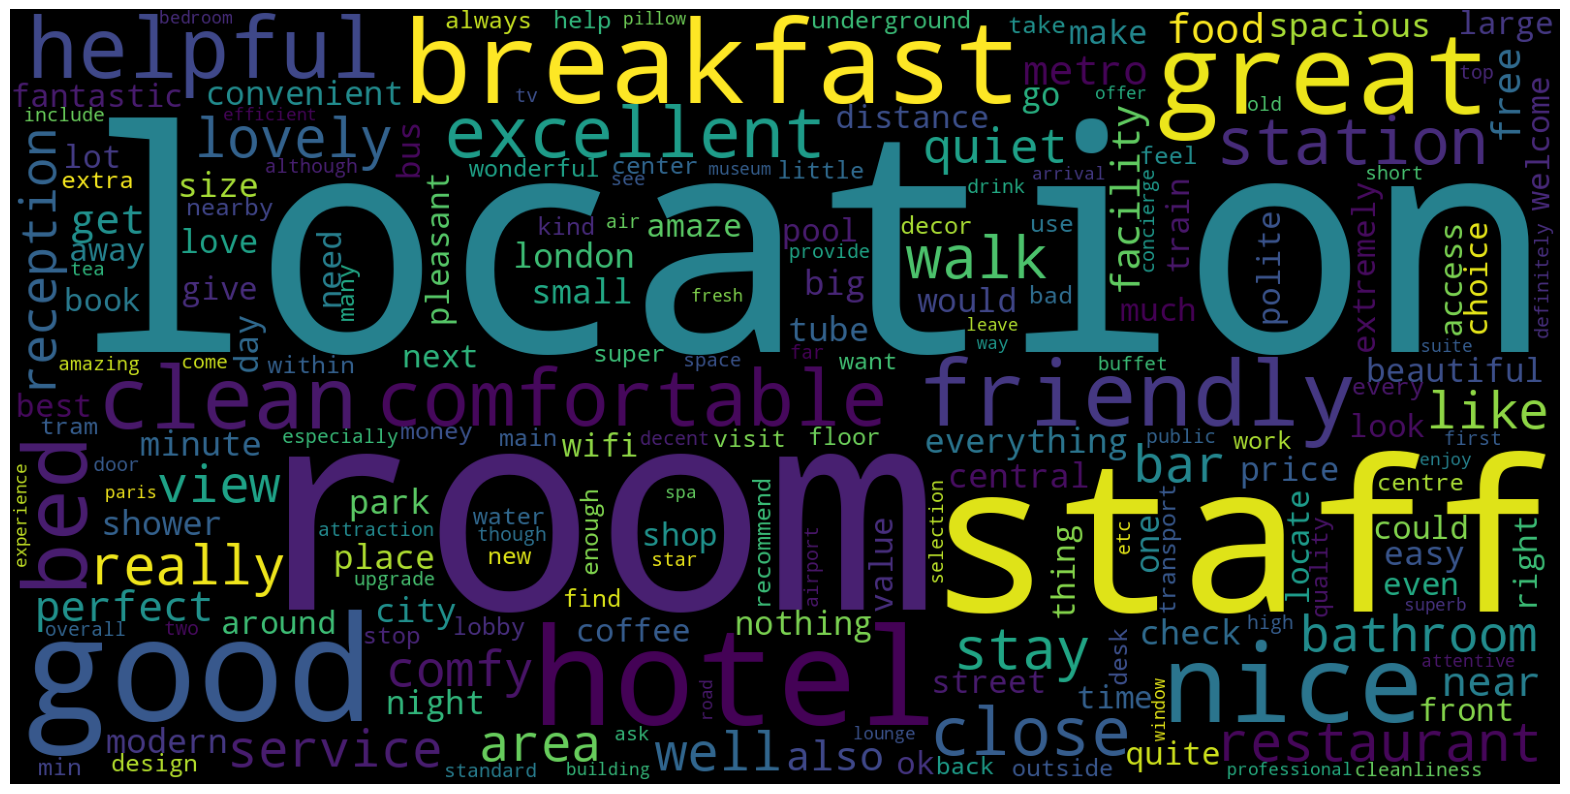

In [ ]:
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="black").generate_from_frequencies(Counter(reviews_pos_list))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

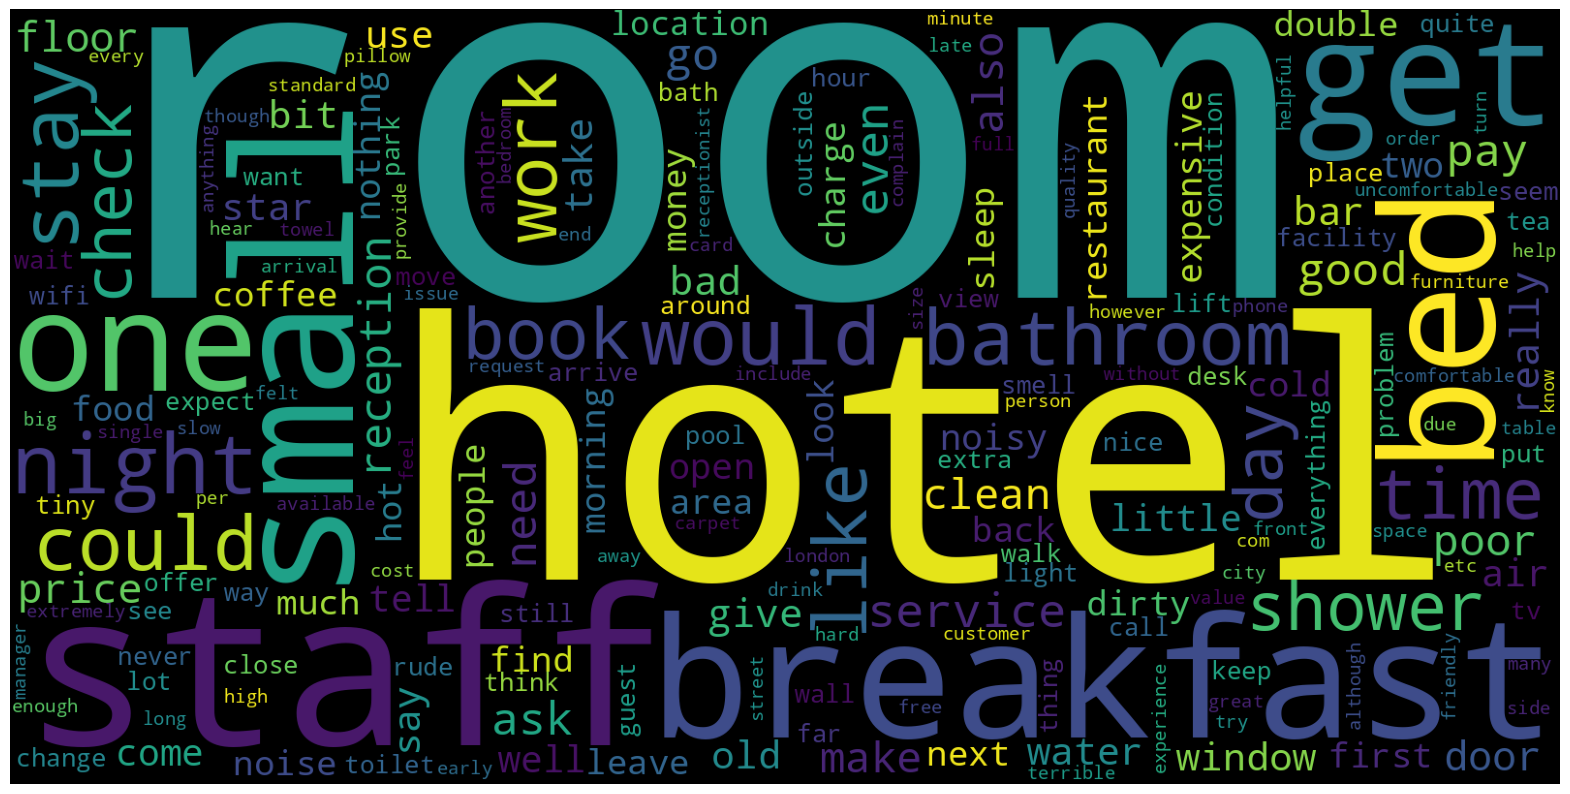

In [ ]:
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="black").generate_from_frequencies(Counter(reviews_neg_list))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

Sulle recensioni unite

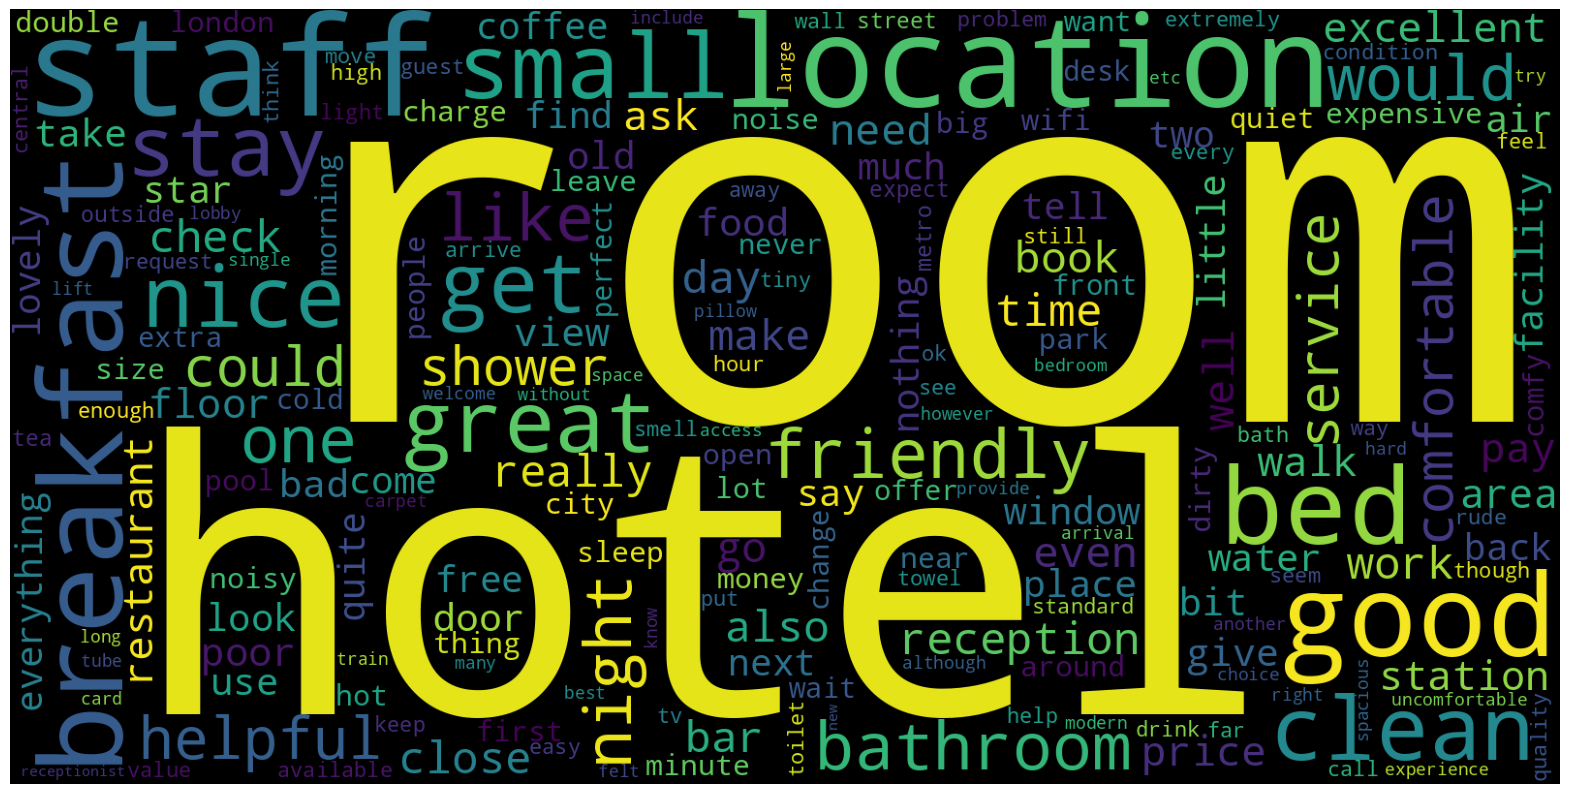

In [ ]:
reviews= df['review'].apply(lambda x: clean_text(x))
reviews_token = [word_tokenize(sublist) for sublist in reviews]
reviews_list = [item for sublist in reviews_token for item in sublist]
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="black").generate_from_frequencies(Counter(reviews_list))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

##Vectorization

TF computes the classic number of times the word appears in the text
IDF computes the relative importance of this word which depends on how many texts the word can be found

We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.

si sceglie di utilizzare TFIDF per garnatire una buona spegabilità dei risultato ottenuti

In [ ]:
review =df['review_preprocessed']
review

0        angry make post available via possible site us...
1        room dirty afraid walk barefoot floor look cle...
2        clean change sheet duvet everyday make bed als...
3        start big noise worker load wood window stupid...
4        floor room filfy dirty basic room old tv room ...
                               ...                        
54593              water room excellent location use hotel
54594       tea coffee facility room private valet park ng
54595    confusion access executive lounge skylounge magic
54596           breakfast bit average side staff room best
54597    dislike wardrobe hanger prefer ordinary one ho...
Name: review_preprocessed, Length: 54598, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 100)
tfidf_result = tfidf.fit_transform(df["review_preprocessed"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

In [ ]:
df

Hotel_Name  Average_Score  \
0                                            Hotel Arena            7.7   
1                                            Hotel Arena            7.7   
2                                            Hotel Arena            7.7   
3                                            Hotel Arena            7.7   
4                                            Hotel Arena            7.7   
...                                                  ...            ...   
54593                         Holiday Inn London Wembley            8.3   
54594                       Canary Riverside Plaza Hotel            8.9   
54595    DoubleTree by Hilton Amsterdam Centraal Station            8.4   
54596                            Royal Passeig de Gracia            8.6   
54597  Millennium Copthorne Hotels at Chelsea Footbal...            8.2   

                                         Negative_Review  \
0       I am so angry that i made this post available...   
1       My room was dirty and I was afraid to walk ba...   
2       Cleaner did not change our sheet and duvet ev...   
3       6 30 AM started big noise workers loading woo...   
4       The floor in my room was filfy dirty Very bas...   
...                                                  ...   
54593         Only 2 waters when there was 4 in the room   
54594                   No tea coffee facilities in room   
54595         Confusion over access to Executive lounge    
54596                Breakfast a bit on the average side   
54597   Dislike the wardrobe hangers prefer ordinary ...   

                                         Positive_Review Reviewer_Nationality  \
0       Only the park outside of the hotel was beauti...              Russia    
1       Great location in nice surroundings the bar a...      United Kingdom    
2       The room is spacious and bright The hotel is ...      United Kingdom    
3                                   Style location rooms              France    
4                               Comfy bed good location       United Kingdom    
...                                                  ...                  ...   
54593   Excellent location will be using this hotel a...      United Kingdom    
54594                             Private valet parks ng      United Kingdom    
54595                                 Skylounge is Magic      United Kingdom    
54596                             Staff Room at the best             Germany    
54597   Location great have stayed twice before comfo...              Canada    

                                                  review  Reviewer_Score  \
0       I am so angry that i made this post available...               0   
1       My room was dirty and I was afraid to walk ba...               0   
2       Cleaner did not change our sheet and duvet ev...               0   
3       6 30 AM started big noise workers loading woo...               0   
4       The floor in my room was filfy dirty Very bas...               0   
...                                                  ...             ...   
54593   Only 2 waters when there was 4 in the room Ex...               1   
54594   No tea coffee facilities in room Private vale...               1   
54595   Confusion over access to Executive lounge  Sk...               1   
54596   Breakfast a bit on the average side Staff Roo...               1   
54597   Dislike the wardrobe hangers prefer ordinary ...               1   

       Words Per Review                                review_preprocessed  \
0                   404  angry make post available via possible site us...   
1                   232  room dirty afraid walk barefoot floor look cle...   
2                    47  clean change sheet duvet everyday make bed als...   
3                    76  start big noise worker load wood window stupid...   
4                    30  floor room filfy dirty basic room old tv room ...   
...                 ...                                               

si procede con il salvataggio del modello di vettorizzazione per utilizzi futuri

In [ ]:
import joblib
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
# Calcola la somma dei valori per ogni riga
tfidf_df['sum_values'] = tfidf_df.sum(axis=1)
# Ordina il DataFrame in base alla somma dei valori in ordine decrescente
sorted_df = tfidf_df.sort_values(by='sum_values', ascending=False)
# Seleziona le prime 10 righe
top_10_rows = sorted_df.head(10)
# Visualizza le prime 10 righe del dataset vettorizzato con i valori più alti
print(top_10_rows.iloc[:,:7])

       word_able  word_absolutely   word_ac  word_accept  word_acceptable  \
43309   0.047783         0.049028  0.000000     0.000000         0.000000   
32949   0.000000         0.000000  0.000000     0.000000         0.000000   
47219   0.000000         0.000000  0.000000     0.000000         0.000000   
12696   0.061460         0.000000  0.000000     0.000000         0.000000   
7208    0.000000         0.000000  0.000000     0.000000         0.000000   
3024    0.000000         0.058678  0.000000     0.000000         0.000000   
8473    0.000000         0.000000  0.000000     0.000000         0.000000   
20914   0.000000         0.000000  0.000000     0.000000         0.000000   
4060    0.000000         0.000000  0.116515     0.000000         0.000000   
14830   0.000000         0.064149  0.000000     0.079754         0.076438   

       word_access  word_accessible  
43309          0.0              0.0  
32949          0.0              0.0  
47219          0.0              0.0  


##Split Train Test

Si effetua uno split in train-test
con proporzione 80% 20%

Non si genera validate set, in quanto di utilizza cross validation
e tuning degli iperparametri

In [ ]:
ignore_cols = ["Reviewer_Score", "Words Per Review", "Hotel_Name", "Average_Score","Negative_Review", "Positive_Review", "review","review_preprocessed", "Reviewer_Nationality"]
features = [c for c in df.columns if c not in ignore_cols]
df[features]

word_able  word_absolutely  word_ac  word_accept  word_acceptable  \
0        0.07118              0.0      0.0          0.0              0.0   
1        0.00000              0.0      0.0          0.0              0.0   
2        0.00000              0.0      0.0          0.0              0.0   
3        0.00000              0.0      0.0          0.0              0.0   
4        0.00000              0.0      0.0          0.0              0.0   
...          ...              ...      ...          ...              ...   
54593    0.00000              0.0      0.0          0.0              0.0   
54594    0.00000              0.0      0.0          0.0              0.0   
54595    0.00000              0.0      0.0          0.0              0.0   
54596    0.00000              0.0      0.0          0.0              0.0   
54597    0.00000              0.0      0.0          0.0              0.0   

       word_access  word_accessible  word_accommodate  word_accommodation  \
0         0.000000              0.0               0.0                 0.0   
1         0.000000              0.0               0.0                 0.0   
2         0.000000              0.0               0.0                 0.0   
3         0.000000              0.0               0.0                 0.0   
4         0.000000              0.0               0.0                 0.0   
...            ...              ...               ...                 ...   
54593     0.000000              0.0               0.0                 0.0   
54594     0.000000              0.0               0.0                 0.0   
54595     0.515351              0.0               0.0                 0.0   
54596     0.000000              0.0               0.0                 0.0   
54597     0.000000              0.0               0.0                 0.0   

       word_account  ...  word_worth  word_would  word_write  word_wrong  \
0               0.0  ...         0.0    0.043234         0.0    0.000000   
1               0.0  ...         0.0    0.000000         0.0    0.000000   
2               0.0  ...         0.0    0.000000         0.0    0.000000   
3               0.0  ...         0.0    0.000000         0.0    0.181266   
4               0.0  ...         0.0    0.000000         0.0    0.000000   
...             ...  ...         ...         ...         ...         ...   
54593           0.0  ...         0.0    0.000000         0.0    0.000000   
54594           0.0  ...         0.0    0.000000         0.0    0.000000   
54595           0.0  ...         0.0    0.000000         0.0    0.000000   
54596           0.0  ...         0.0    0.000000         0.0    0.000000   
54597           0.0  ...         0.0    0.000000         0.0    0.000000   

       word_yard  word_year  word_yes  word_yet  word_young  word_zero  
0            0.0        0.0       0.0       0.0         0.0        0.0  
1            0.0        0.0       0.0       0.0         0.0        0.0  
2            0.0        0.0       0.0       0.0         0.0        0.0  
3            0.0        0.0       0.0       0.0         0.0        0.0  
4            0.0        0.0       0.0       0.0         0.0        0.0  
...          ...        ...       ...       ...         ...        ...  
54593        0.0        0.0       0.0       0.0         0.0        0.0  
54594        0.0        0.0       0.0       0.0         0.0        0.0  
54595        0.0        0.0       0.0       0.0         0.0        0.0  
54596        0.0        0.0       0.0       0.0         0.0        0.0  
54597        0.0        0.0       0.0       0.0         0.0        0.0  

[54598 rows x 1505 columns]

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test  = train_test_split(
        df[features],
        df.Reviewer_Score,
        train_size=0.80,
        random_state=1234)

##Different Model Comparation

Diversi modelli con Cross-Validation di 10 folder

LR: 0.804334 (0.003319)
NB: 0.724147 (0.004675)
CART: 0.678358 (0.003763)
RF: 0.777812 (0.007625)


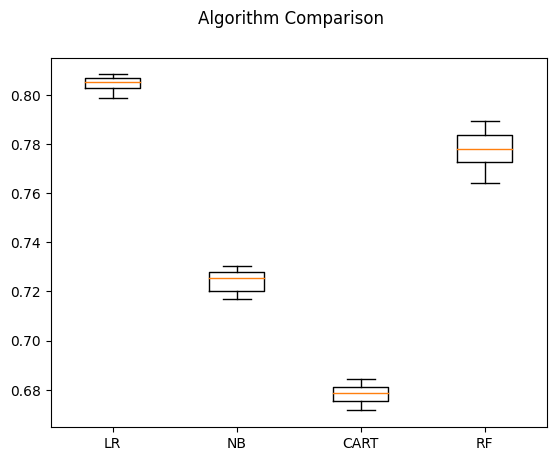

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

X = df[features]
Y = df.Reviewer_Score
seed = 42
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Logistic Regression

### Fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 250, random_state=42)

In [ ]:
log_model = log_model.fit(X=X_train, y=y_train)

### Performance

In [ ]:
y_pred = log_model.predict(X_test)
print(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_test = log_model.predict(X_train)
print(accuracy_score(y_train, y_pred_test))

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

#### Classification Report

In [ ]:
from sklearn.metrics import classification_report
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))

### Analisi aggiuntive
I blocchi sucessivi non vengono eseguiti in quanto risorse di Colab non lo consentono, vengono comunque predisposti per analisi future al fine di migliorare le performance dei modelli.

#### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
lr_c = LogisticRegression(max_iter = 250)
scores = cross_val_score(lr_c, df[features], df.Reviewer_Score, cv=3)

In [ ]:
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
from sklearn.model_selection import cross_validate
scoring = ['precision_macro', 'recall_macro']
lr_c = LogisticRegression(max_iter = 250)
scores = cross_validate(lr_c, df[features], df.Reviewer_Score, scoring=scoring,
                        cv=3, return_train_score=False)


In [ ]:
print(sorted(scores.keys()))
scores['test_precision_macro']

####Cross Validation Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

lr= LogisticRegression(random_state=42)
parameters = {'penalty': ['l1','l2'], 'C': [0.001,100,1000]}
CV_lr = GridSearchCV(estimator = lr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                            n_jobs=5)

CV_lr.fit(df[features],
        df.Reviewer_Score,)
CV_lr.best_params_
CV_lr.best_score_

## Random Forest

### Fitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, random_state = 42, criterion='gini')
rf = rf.fit(X=X_train.values, y=y_train)

###Performance

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_test = rf.predict(X_train)
print(accuracy_score(y_train, y_pred_test))

So, the model is learning as expected :)

In [ ]:
y_pred = rf.predict(X_test.values)
print(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

#### Classification Report

In [ ]:
from sklearn.metrics import classification_report
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
import joblib
joblib.dump(rf, 'Hotel_Review_RF_model.pkl')

['Hotel_Review_RF_model.pkl']

In [ ]:
import pickle

# save the model to disk
filename = 'hotel-rf.sav'
pickle.dump(rf, open(filename, 'wb'))

### Analisi aggiuntive
I blocchi sucessivi non vengono eseguiti in quanto risorse di Colab non lo consentono, vengono comunque predisposti per analisi future al fine di migliorare le performance dei modelli.

#### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
rf_c = RandomForestClassifier(n_estimators = 500, random_state = 42, criterion='gini')
scores = cross_val_score(rf_c, df[features], df.Reviewer_Score, cv=3)

In [ ]:
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
from sklearn.model_selection import cross_validate
scoring = ['precision_macro', 'recall_macro']
rf_c =RandomForestClassifier(n_estimators = 500, random_state = 42, criterion='gini')
scores = cross_validate(rf_c, df[features], df.Reviewer_Score, scoring=scoring,
                        cv=3, return_train_score=False)


In [ ]:
print(sorted(scores.keys()))
scores['test_precision_macro']

#### Cross-Validation e Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3, n_jobs=5, scoring="accuracy")
CV_rfc.fit(df[features],
        df.Reviewer_Score,)
CV_rfc.best_params_
CV_rfc.best_score_

## Feature Importance

In [ ]:
importance = rf.feature_importances_
# summarize feature importance

list_score =[]
list_feature =[]
max= 0
for i,v in enumerate(importance):
  #print('Feature: %0d, Score: %.5f' % (i,v) + "\t" + df.columns.values[i])
  list_score.append(v)
  list_feature.append(df.columns.values[i])
  if(v> max):
    max=v
    feature=i

In [ ]:
list_feature=X_test.columns.tolist()

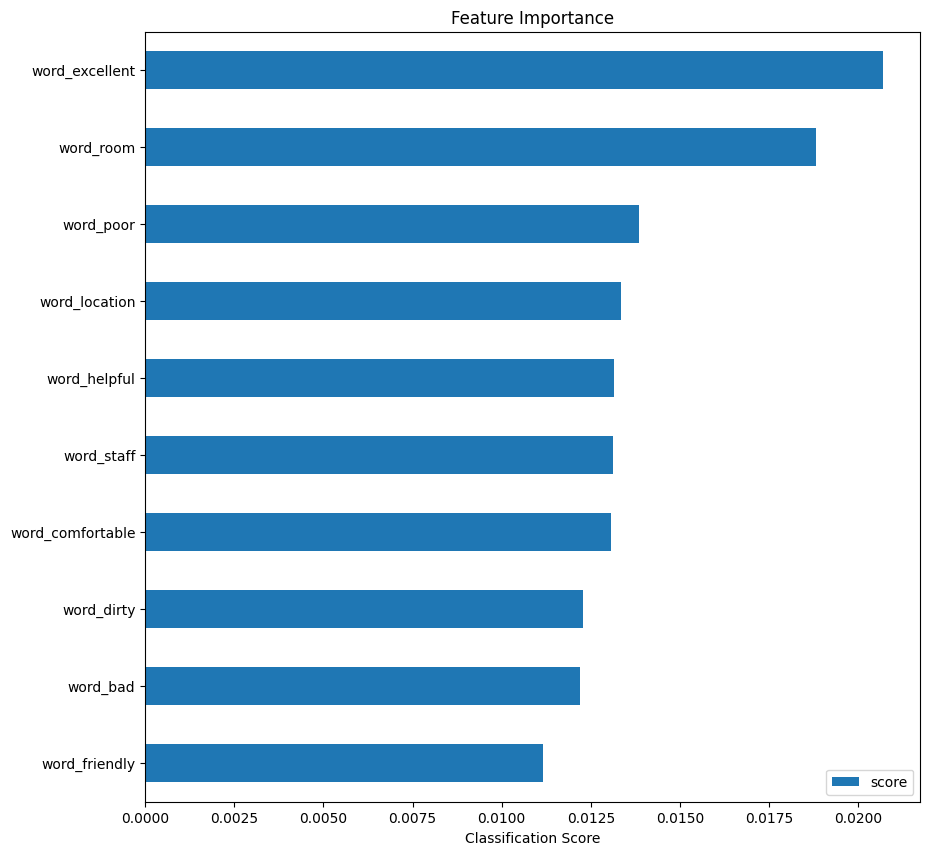

In [ ]:
# plot feature importance
fi = pd.DataFrame({'score': list_score}, index=list_feature)
fi = fi.sort_values(by=['score'], ascending=True).tail(10)
ax = fi.plot.barh(figsize=(10,10), title="Feature Importance")
ax.set_xlabel("Classification Score")
fig = ax.get_figure()
fig.savefig('DT-feature_importance.png')

## SHAP Explanation

Visto l'impatto del modello sul mondo reale è importante analizzare perchè una renesione ottiene una determinata classificazione.

In [ ]:
!pip install shap
!pip install joblib

In [ ]:
import shap
import joblib
from shap import TreeExplainer
from shap import summary_plot

shap.initjs()

feature_names=tfidf.get_feature_names_out()

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train, approximate=True, check_additivity=False)

ex_filename = 'SHAP_Explainer.bz2'
joblib.dump(explainer, filename=ex_filename, compress=('bz2', 9))
ex2 = joblib.load(filename=ex_filename)

In [ ]:
np.array(shap_values).shape


(2, 10920, 1482)

#### Positive

Text(0.5, 1.0, 'SHAP Explanation- Hotel- Positive')

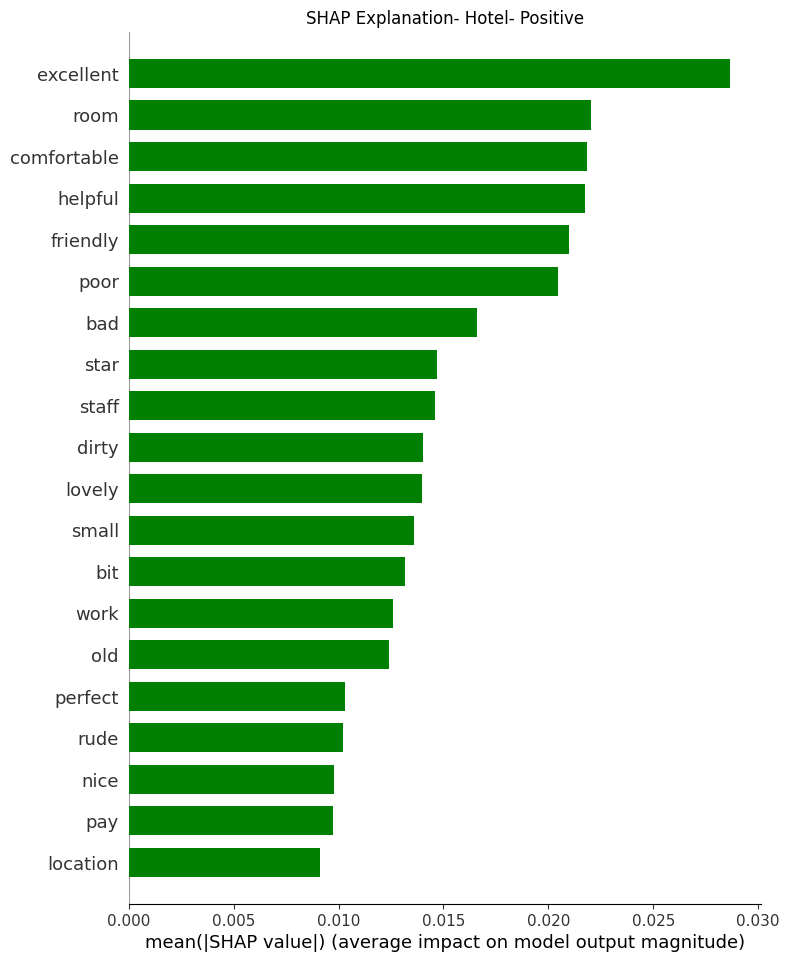

In [ ]:
import matplotlib.pyplot as plt

class_names = ["Negative", "Positive"]

shap.summary_plot(shap_values[1], X_train, plot_type="bar", class_names= class_names,
                  feature_names = feature_names, max_display=20,
                 show=False, color="Green")

plt.title("SHAP Explanation- Hotel- Positive")

#### Negative

Text(0.5, 1.0, 'SHAP Explanation- Hotel- Negative')

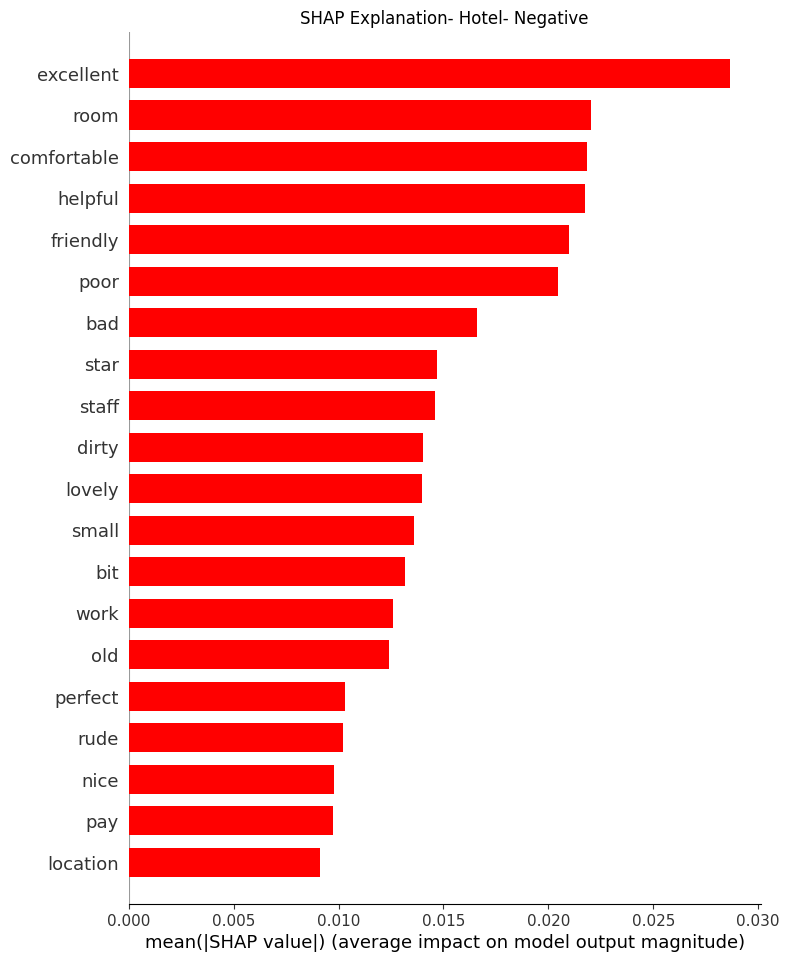

In [ ]:
import matplotlib.pyplot as plt

class_names = ["Negative", "Positive"]

shap.summary_plot(shap_values[0], X_train, plot_type="bar", class_names= class_names,
                  feature_names = feature_names, max_display=20,
                 show=False, color="Red")

plt.title("SHAP Explanation- Hotel- Negative")

### Negative Detail Single Instance

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


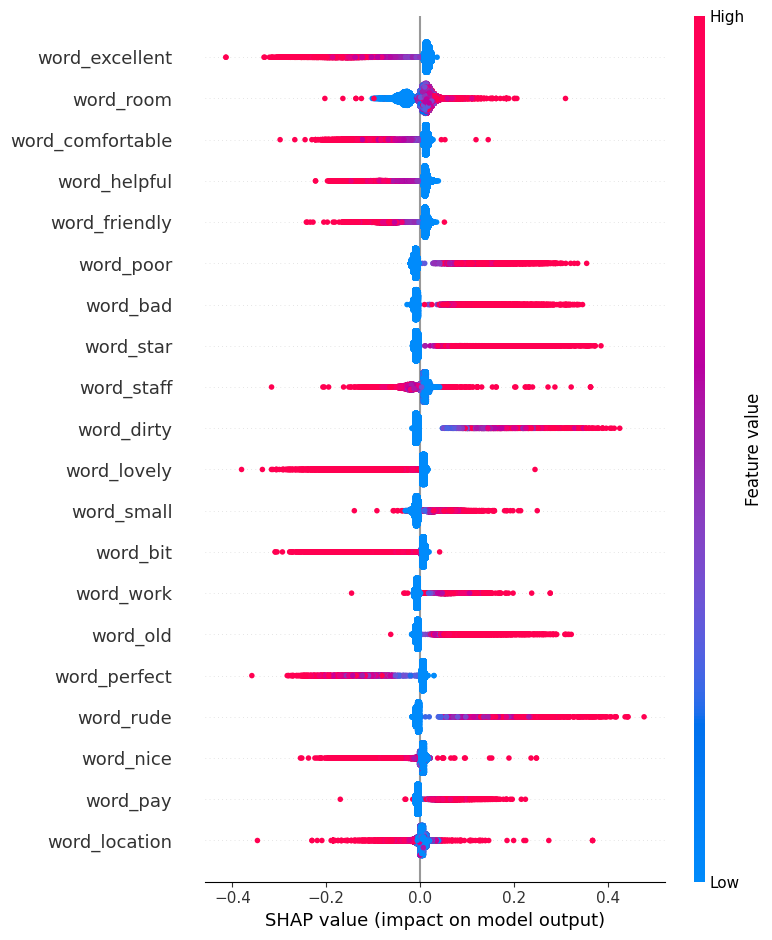

In [ ]:
shap.summary_plot(shap_values[0], X_train)

Ongi punto è uno shap value per una festure e un istanza specifica possiamo vedere che hanno versi opposti le distribuzioni nonostante si consentrano quindi la feature discrimina in combinazione con altre.

### Positive Detail Single Instance

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


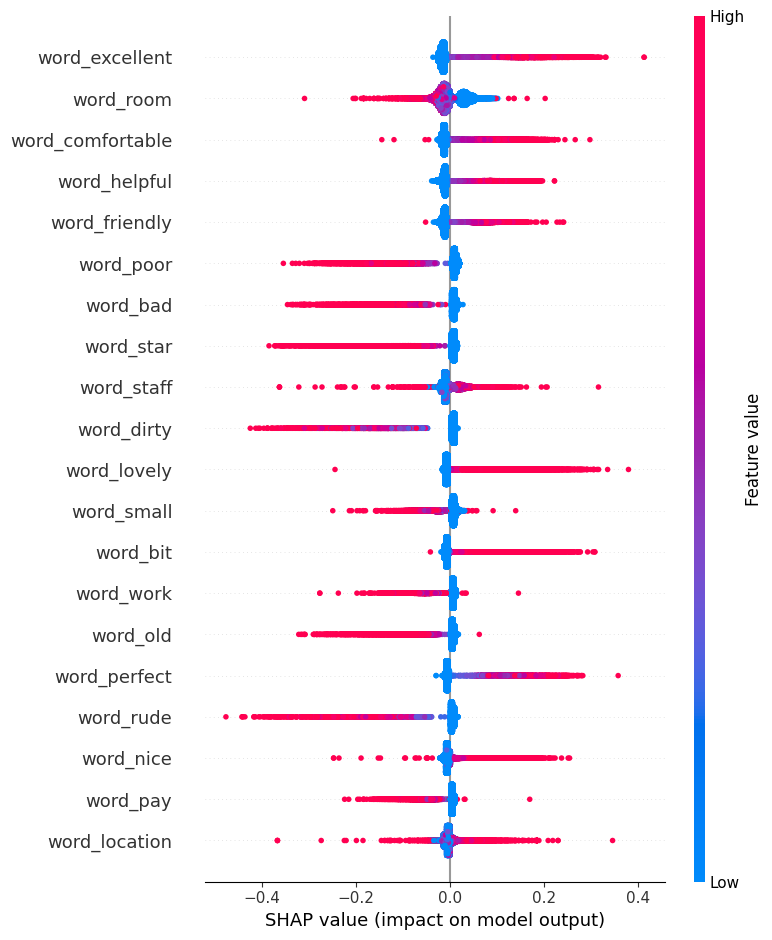

In [ ]:
shap.summary_plot(shap_values[1], X_train)

### General

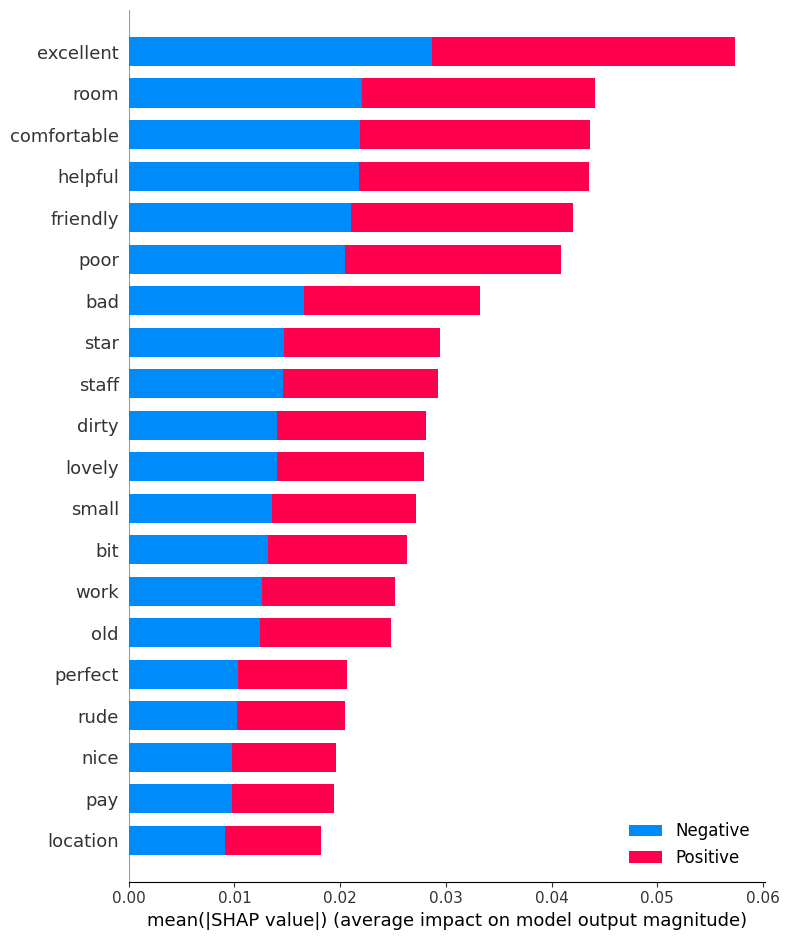

In [ ]:
shap.summary_plot(shap_values, feature_names= feature_names, class_names= class_names,
show=False)
plt.savefig('grafic.png')

In [ ]:
import matplotlib.pyplot as pl
fig= pl.savefig("shap_summary.png",dpi=700)

<Figure size 640x480 with 0 Axes>

In [ ]:
rf.classes_

array([0, 1])

### Lime Explanation

In [ ]:
!pip install lime

In [ ]:
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
c = make_pipeline(tfidf, rf)

rew_cleaned = clean_text("I recently had the pleasure of staying at this disgusting hotel")
print(c.predict_proba([rew_cleaned]))


class_names = ["Negative", "Positive"]
explainer = LimeTextExplainer(class_names=class_names)

idx =121
exp = explainer.explain_instance(df.loc[1, 'review_preprocessed'], c.predict_proba, num_features=2567)
print('Document id: %d' % idx)
print('Predicted class =', rf.predict(tfidf.transform([clean_text(df.iloc[idx]['review'])]).toarray()))
print('True class: %s' % class_names[df.iloc[idx]['Reviewer_Score']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



[[0.59663015 0.40336985]]
Document id: 121
Predicted class = [0]
True class: Negative


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
df.loc[12322]

Hotel_Name                          Shaftesbury Premier London Paddington
Average_Score                                                         7.3
Negative_Review          Rooms are very small There is a small table a...
Positive_Review                             From desk staff were helpful 
Reviewer_Nationality                                               India 
                                              ...                        
word_year                                                             0.0
word_yes                                                              0.0
word_yet                                                              0.0
word_young                                                            0.0
word_zero                                                             0.0
Name: 12322, Length: 1491, dtype: object

In [ ]:
exp.save_to_file('/tmp/oi.html')
exp.show_in_notebook(text=True)

In [ ]:
exp.show_in_notebook(text=False)

##Lessico

###NRC

In [ ]:
# import the lexicon
lexicon_df = pd.read_excel("NRC-Emotion-Lexicon-v0.92-InManyLanguages-web.xlsx", engine="openpyxl")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
# create a dict mapping word to value
lexicon = {}

#https://www.w3schools.com/python/ref_func_zip.asp

for word, pos, neg in zip(lexicon_df["English Word"], lexicon_df["Positive"], lexicon_df["Negative"]):
  if pos:
    value = 1
  elif neg:
    value = -1 #i do not consider 0's
  else:
    continue
  lexicon[str(word).lower()] = value #lower case

In [ ]:
# this custom function will return the sentiment associated to a sentence via the sum of single words
def myscore(sentence):
  sentiment = 0
  for word in sentence.split(): #split function: divides the string from spaces
    sentiment += lexicon.get(word.lower()) if lexicon.get(word.lower()) is not None else 0 #+= operator
  return sentiment

In [ ]:
# apply myscore function
df['NRC_Score'] = df["review"].apply(myscore)
df[['review','Reviewer_Score', 'NRC_Score']].tail(30)

In [ ]:
# apply myscore function to processed
df['NRC_Score_pr'] = df["review_preprocessed"].apply(myscore)
df[['review_preprocessed','Reviewer_Score', 'NRC_Score_pr']].tail(30)

In [ ]:
def new_score(score):
    if score == 0:
        return -1
    else:
        return +1

non processato

In [ ]:
df_relevant = df.copy()
df_relevant["Reviewer_Score"] = df["Reviewer_Score"].apply(new_score)
df_relevant['Reviewer_Score'] = df_relevant['Reviewer_Score'].astype(int)
df_relevant['NRC_Score'] = df_relevant['NRC_Score'].astype(int)
confusion = pd.crosstab(np.sign(df_relevant.Reviewer_Score), np.sign(df_relevant.NRC_Score))
confusion_2_class = confusion.iloc[[0,1],[0,2]]
confusion_2_class

NRC_Score         -1      1
Reviewer_Score             
-1              6443  16106
 1              2058  21633

In [ ]:
accuracy_2_class = np.sum(np.diag(confusion_2_class)) / np.sum(confusion_2_class.values)
accuracy_2_class

0.6071799307958478

processato

In [ ]:
df_relevant = df.copy()
df_relevant["Reviewer_Score"] = df["Reviewer_Score"].apply(new_score)
df_relevant['Reviewer_Score'] = df_relevant['Reviewer_Score'].astype(int)
df_relevant['NRC_Score_pr'] = df_relevant['NRC_Score_pr'].astype(int)
confusion = pd.crosstab(np.sign(df_relevant.Reviewer_Score), np.sign(df_relevant.NRC_Score_pr))
confusion_2_class = confusion.iloc[[0,1],[0,2]]
confusion_2_class

NRC_Score_pr      -1      1
Reviewer_Score             
-1              8965  13078
 1              3305  19196

In [ ]:
accuracy_2_class = np.sum(np.diag(confusion_2_class)) / np.sum(confusion_2_class.values)
accuracy_2_class

0.6322063577586207

###AFFIN

In [ ]:
pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=699d18df3c10d64f499e87d2cc751d35dbaa3ed0fe1b236f3252e6165b0724e6
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
from afinn import Afinn

In [ ]:
afinn = Afinn()

#originale
df['afinn'] = df["review"].apply(afinn.score)

#preprocessato
df['afinn_pr'] = df["review_preprocessed"].apply(afinn.score)

Originale

In [ ]:
df_relevant1 = df.copy()
df_relevant1["Reviewer_Score"] = df["Reviewer_Score"].apply(new_score)
df_relevant1['Reviewer_Score'] = df_relevant1['Reviewer_Score'].astype(int)
df_relevant1['afinn'] = df_relevant1['afinn'].astype(int)
confusion = pd.crosstab(np.sign(df_relevant1.Reviewer_Score), np.sign(df_relevant1.afinn))
confusion_2_class = confusion.iloc[[0,1],[0,2]]
confusion_2_class

afinn             -1      1
Reviewer_Score             
-1              9104  15080
 1              1898  23624

In [ ]:
accuracy_2_class = np.sum(np.diag(confusion_2_class)) / np.sum(confusion_2_class.values)
accuracy_2_class

0.6584315776767392

Preprocessato

In [ ]:
df_relevant1 = df.copy()
df_relevant1["Reviewer_Score"] = df["Reviewer_Score"].apply(new_score)
df_relevant1['Reviewer_Score'] = df_relevant1['Reviewer_Score'].astype(int)
df_relevant1['afinn_pr'] = df_relevant1['afinn_pr'].astype(int)
confusion = pd.crosstab(np.sign(df_relevant1.Reviewer_Score), np.sign(df_relevant1.afinn_pr))
confusion_2_class = confusion.iloc[[0,1],[0,2]]
confusion_2_class

afinn_pr           -1      1
Reviewer_Score              
-1              10455  12428
 1               2539  21516

In [ ]:
accuracy_2_class = np.sum(np.diag(confusion_2_class)) / np.sum(confusion_2_class.values)
accuracy_2_class

0.68113255784226